In [46]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [47]:
import numpy as np
import pandas as pd

In [48]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [49]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, and_


In [50]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [51]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [52]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [53]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [54]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

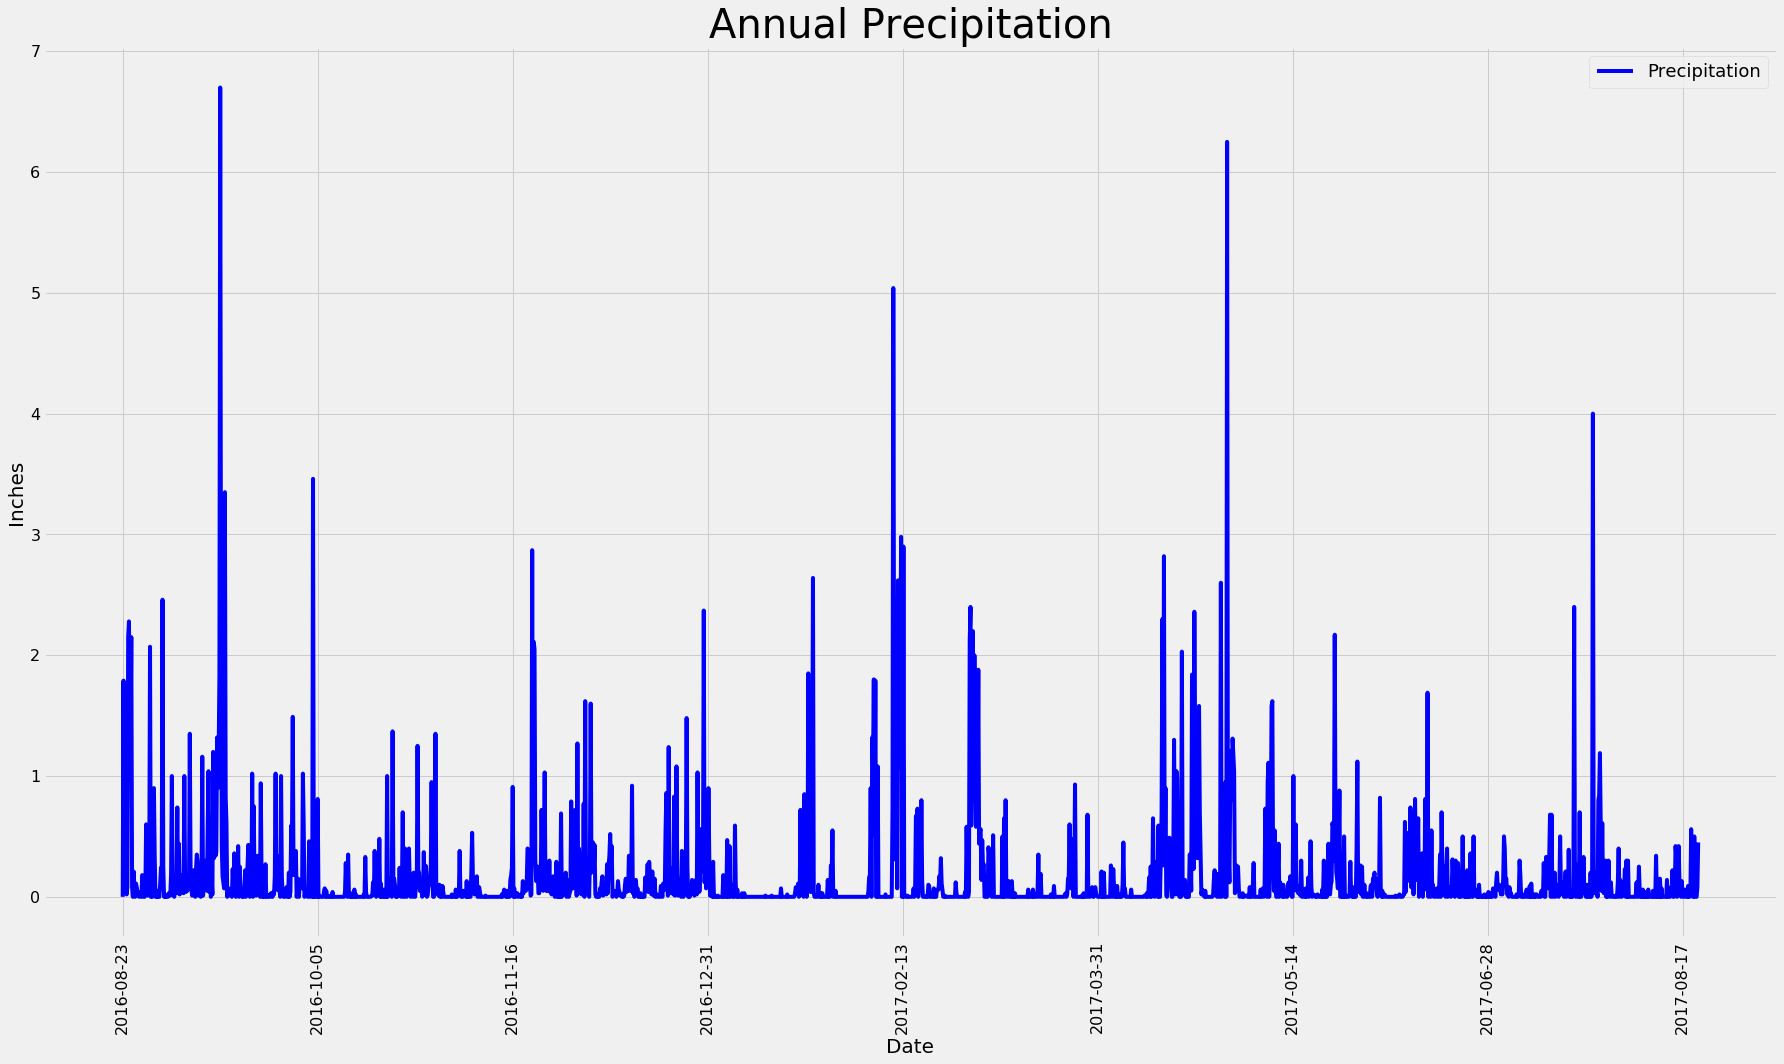

In [65]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
one_year=session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Perform a query to retrieve the data and precipitation scores
precip_data=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=( dt.datetime.strptime(last_point[0],'%Y-%m-%d') - dt.timedelta(days=366))).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_data_df=pd.DataFrame(data)
precip_data_df=precip_data_df.set_index("date")

# Sort the dataframe by date
sorted_precip_df=precip_data_df.sort_index().dropna(how='any')

# Use Pandas Plotting with Matplotlib to plot the data
precip_graph=sorted_precip_df.plot(figsize=(25,15), color='blue')
plt.title("Annual Precipitation",fontSize=40)
plt.xticks(fontSize=16,rotation ="vertical")
plt.yticks(fontSize=16)
plt.ylabel("Inches",fontSize=20)
plt.xlabel("Date",fontSize=20)
plt.legend(["Precipitation"],fontsize=18)
plt.tight_layout()
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_precip_df.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [57]:
# Design a query to show how many stations are available in this dataset?
total_stations=session.query(Measurement.station).distinct().count()
total_stations

9

In [58]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_station=session.query(Measurement.station,func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
most_active_station_list=[{"Station": rec[0],"Count":rec[1]} for rec in most_active_station]
most_active_station_df=pd.DataFrame(most_active_station_list)
most_active_station_df

,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [59]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temps=session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station==act_station[0][0]).all()
temps_results_df=pd.DataFrame({"Min":result[0][0], 
                        "Max":result[0][1],
                        "Avg":result[0][2]}, index=[0])

temps_results_df

,Min,Max,Avg
0,54.0,85.0,71.663781


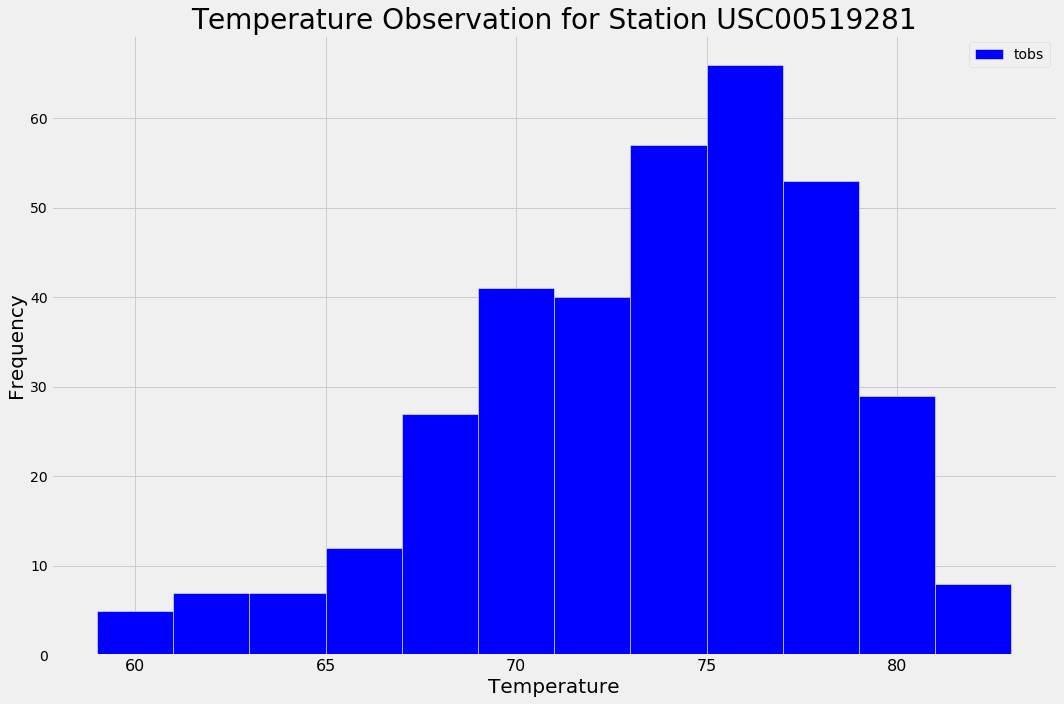

In [64]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_temps_station=session.query(Measurement.station,Measurement.tobs).filter(and_(Measurement.station=='USC00519281', Measurement.date>=( dt.datetime.strptime(last_point[0],'%Y-%m-%d') - dt.timedelta(days=366)))).all()
most_temps_station_data_df=pd.DataFrame(station_data)
most_temps_station_data_df=most_temps_station_data_df.set_index('station')

most_temps_station_data_df.plot.hist(bins=12,figsize=(15,10),color='blue',alpha=1,edgecolor='white')
plt.title("Temperature Observation for Station USC00519281",fontSize=28)
plt.xticks(fontSize=16)
plt.xlabel("Temperature",fontSize=20)
plt.ylabel("Frequency",fontSize=20)
plt.tight_layout()
plt.show()